<a href="https://colab.research.google.com/github/2403a52269-code/NLP/blob/main/NLP_5_4_2403A52269.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

In [40]:
data=pd.read_csv('/content/Tweets.csv')
print(data.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [41]:
tweets=data['text']
print("Extracted tweets:")
for i,tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweets}")


Extracted tweets:
1. 0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object
2. 0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad 

In [42]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)

tokenized_tweets = tweets.apply(tokenize_text)
print("\nfirst 5 Tokenized tweets:")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")


first 5 Tokenized tweets:
1. ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
2. ['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']
3. ['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']
4. ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']
5. ['@', 'VirginAmerica', 'and', 'it', "'s", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


In [44]:
import re

def extract_actual_hashtags(text):
    return re.findall(r"#(\w+)", text)

actual_hashtags = tweets.apply(extract_actual_hashtags)
print("\nfirst 5 actual hashtags:")
for i, hashtags in enumerate(actual_hashtags.head()):
    print(f"{i+1}. {hashtags}")


first 5 actual hashtags:
1. []
2. []
3. []
4. []
5. []


In [45]:
from collections import Counter

all_hashtags = [item for sublist in actual_hashtags for item in sublist]

print("\nTop 10 most common hashtags:")
hashtag_counts = Counter(all_hashtags)

for hashtag, count in hashtag_counts.most_common(10):
    print(f"{hashtag}: {count}")


Top 10 most common hashtags:
DestinationDragons: 75
fail: 57
jetblue: 35
UnitedAirlines: 35
customerservice: 34
usairwaysfail: 26
AmericanAirlines: 24
disappointed: 22
avgeek: 19
badservice: 19


In [46]:
import matplotlib.pyplot as plt



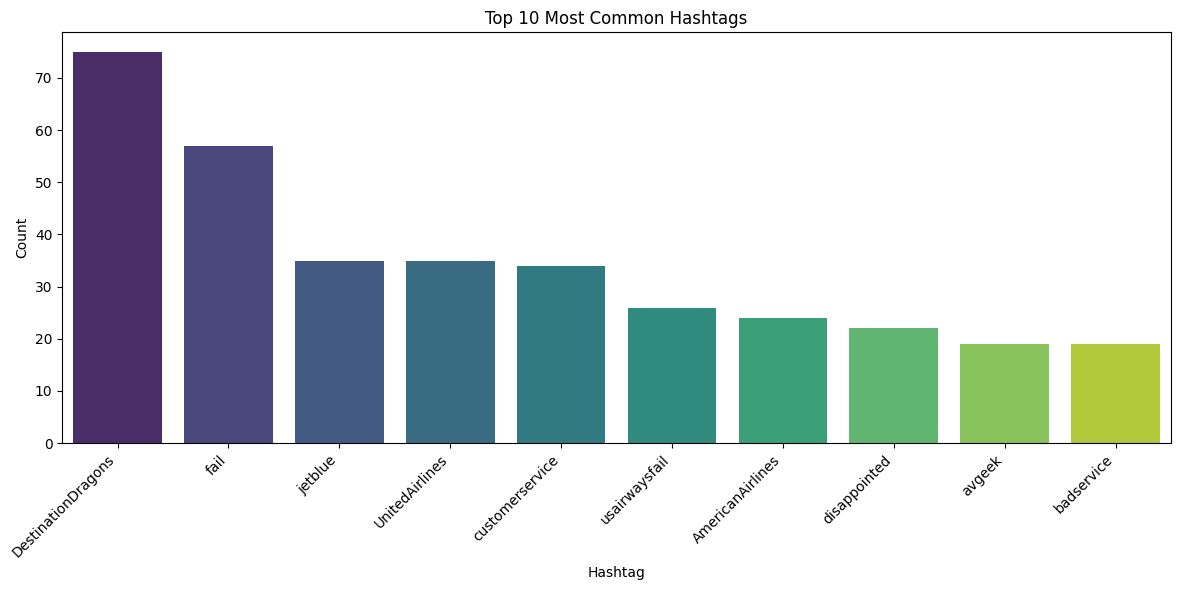

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

top_hashtags = hashtag_counts.most_common(10);
hashtag = [tag for tag, count in top_hashtags];
hashtag_values = [count for tag, count in top_hashtags];

plt.figure(figsize=(12, 6));
sns.barplot(x=hashtag, y=hashtag_values, hue=hashtag, palette='viridis', legend=False);
plt.title('Top 10 Most Common Hashtags');
plt.xlabel('Hashtag');
plt.ylabel('Count');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();
plt.show();

In [48]:
import re

def clean_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.strip()

cleaned_tweets = tweets.apply(clean_text)

print("Original tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nCleaned tweets (first 5):")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")

Original tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Cleaned tweets (first 5):
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it


In [49]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

tokenized_tweets = cleaned_tweets.apply(tokenize_text)

print("First 5 Cleaned tweets:")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFirst 5 Tokenized tweets:")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


First 5 Cleaned tweets:
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it

First 5 Tokenized tweets:
1. ['what', 'said']
2. ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


In [50]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

filtered_tweets = tokenized_tweets.apply(remove_stopwords)

print("First 5 Tokenized tweets:")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")

print("\n First 5 Filtered tweets:")
for i, tokens in enumerate(filtered_tweets.head()):
    print(f"{i+1}. {tokens}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 5 Tokenized tweets:
1. ['what', 'said']
2. ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']

 First 5 Filtered tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']


In [51]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

lemmatized_tweets = filtered_tweets.apply(lemmatize_tokens)

print("First 5 Filtered tweets:")
for i, tokens in enumerate(filtered_tweets.head()):
    print(f"{i+1}. {tokens}")

print("\nFirst 5 Lemmatized tweets:")
for i, tokens in enumerate(lemmatized_tweets.head()):
    print(f"{i+1}. {tokens}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


First 5 Filtered tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']

First 5 Lemmatized tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercial', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']


In [52]:
def join_tokens(tokens):
    return ' '.join(tokens)

preprocessed_tweets = lemmatized_tweets.apply(join_tokens)

print("Preprocessed tweets (first 5):")
for i, tweet in enumerate(preprocessed_tweets.head()):
    print(f"{i+1}. {tweet}")

Preprocessed tweets (first 5):
1. said
2. plus youve added commercial experience tacky
3. didnt today must mean need take another trip
4. really aggressive blast obnoxious entertainment guest face amp little recourse
5. really big bad thing


In [53]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def pos_tag_tokens(tokens):
    return nltk.pos_tag(tokens)

pos_tagged_tweets = lemmatized_tweets.apply(pos_tag_tokens)

print("\nFirst 5 POS-tagged tweets:")
for i, tagged_tokens in enumerate(pos_tagged_tweets.head()):
    print(f"{i+1}. {tagged_tokens}")

print("\nFirst 5 lemmatized tweets:")
for i, tweet in enumerate(lemmatized_tweets.head()):
    print(f"{i+1}. {tweet}")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



First 5 POS-tagged tweets:
1. [('said', 'VBD')]
2. [('plus', 'CC'), ('youve', 'NN'), ('added', 'JJ'), ('commercial', 'JJ'), ('experience', 'NN'), ('tacky', 'NN')]
3. [('didnt', 'NN'), ('today', 'NN'), ('must', 'MD'), ('mean', 'VB'), ('need', 'MD'), ('take', 'VB'), ('another', 'DT'), ('trip', 'NN')]
4. [('really', 'RB'), ('aggressive', 'JJ'), ('blast', 'NN'), ('obnoxious', 'JJ'), ('entertainment', 'NN'), ('guest', 'JJS'), ('face', 'NN'), ('amp', 'NN'), ('little', 'JJ'), ('recourse', 'NN')]
5. [('really', 'RB'), ('big', 'JJ'), ('bad', 'JJ'), ('thing', 'NN')]

First 5 lemmatized tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercial', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']


# **Using spacy**

In [38]:
import spacy
nlp = spacy.load("en_core_web_sm")

def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

tokenized_tweets = cleaned_tweets.apply(tokenize_text)

print("Tokenized Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Tokens {i+1}:       {tokenized_tweets.iloc[i]}")
    print("-" * 30)

Tokenized Tweets (first 5):
Cleaned Tweet 1: what  said
Tokens 1:       ['what', ' ', 'said']
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Tokens 2:       ['plus', 'you', 've', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Tokens 3:       ['i', 'did', 'nt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Tokens 4:       ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
------------------------------
Cleaned Tweet 5: and its a really big bad thing about it
Tokens 5:       ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
----

In [54]:
import spacy
nlp = spacy.load("en_core_web_sm")

def remove_stopwords_and_spaces(text):
    doc = nlp(text)
    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]
    return filtered_tokens
tokenized_no_stopwords = cleaned_tweets.apply(remove_stopwords_and_spaces)

print("Tokens after removing stopwords, punctuation, and spaces (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print("-" * 30)

Tokens after removing stopwords, punctuation, and spaces (first 5):
Cleaned Tweet 1: what  said
Processed Tokens 1: ['say']
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Processed Tokens 2: ['plus', 've', 'add', 'commercial', 'experience', 'tacky']
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Processed Tokens 3: ['not', 'today', 'mean', 'need', 'trip']
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Processed Tokens 4: ['aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
------------------------------
Cleaned Tweet 5: and its a really big bad thing about it
Processed Tokens 5: ['big', 'bad', 'thing']
------------------------------


In [55]:
rejoined_tweets = tokenized_no_stopwords.apply(lambda x: ' '.join(x))

print("Rejoined Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print(f"Rejoined Text {i+1}:    {rejoined_tweets.iloc[i]}")
    print("-" * 30)

Rejoined Tweets (first 5):
Cleaned Tweet 1: what  said
Processed Tokens 1: ['say']
Rejoined Text 1:    say
------------------------------
Cleaned Tweet 2: plus youve added commercials to the experience tacky
Processed Tokens 2: ['plus', 've', 'add', 'commercial', 'experience', 'tacky']
Rejoined Text 2:    plus ve add commercial experience tacky
------------------------------
Cleaned Tweet 3: i didnt today must mean i need to take another trip
Processed Tokens 3: ['not', 'today', 'mean', 'need', 'trip']
Rejoined Text 3:    not today mean need trip
------------------------------
Cleaned Tweet 4: its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
Processed Tokens 4: ['aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
Rejoined Text 4:    aggressive blast obnoxious entertainment guest face amp little recourse
------------------------------
Cleaned Tweet 5: and its a really big bad thing ab

In [56]:
import spacy
nlp = spacy.load("en_core_web_sm")

def pos_tagging_spacy(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

pos_tagged_tweets = rejoined_tweets.apply(pos_tagging_spacy)

print("PoS Tagging Results (first 5):")
for i in range(5):
    print(f"Rejoined Text {i+1}: {rejoined_tweets.iloc[i]}")
    print(f"PoS Tags {i+1}:    {pos_tagged_tweets.iloc[i]}")
    print("-" * 30)

PoS Tagging Results (first 5):
Rejoined Text 1: say
PoS Tags 1:    [('say', 'VERB')]
------------------------------
Rejoined Text 2: plus ve add commercial experience tacky
PoS Tags 2:    [('plus', 'CCONJ'), ('ve', 'PART'), ('add', 'VERB'), ('commercial', 'ADJ'), ('experience', 'NOUN'), ('tacky', 'ADV')]
------------------------------
Rejoined Text 3: not today mean need trip
PoS Tags 3:    [('not', 'PART'), ('today', 'NOUN'), ('mean', 'VERB'), ('need', 'NOUN'), ('trip', 'NOUN')]
------------------------------
Rejoined Text 4: aggressive blast obnoxious entertainment guest face amp little recourse
PoS Tags 4:    [('aggressive', 'ADJ'), ('blast', 'NOUN'), ('obnoxious', 'ADJ'), ('entertainment', 'NOUN'), ('guest', 'NOUN'), ('face', 'NOUN'), ('amp', 'ADJ'), ('little', 'ADJ'), ('recourse', 'NOUN')]
------------------------------
Rejoined Text 5: big bad thing
PoS Tags 5:    [('big', 'ADJ'), ('bad', 'ADJ'), ('thing', 'NOUN')]
------------------------------


In [57]:
import re
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)

    text = text.lower()

    doc = nlp(text)

    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]

    return ' '.join(filtered_tokens)

preprocessed_tweets_combined = tweets.apply(preprocess_text_spacy)

print("Original Tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFully Preprocessed Tweets (first 5):")
for i, preprocessed_text in enumerate(preprocessed_tweets_combined.head()):
    print(f"{i+1}. {preprocessed_text}")

Original Tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Fully Preprocessed Tweets (first 5):
1. say
2. plus add commercial experience tacky
3. today mean need trip
4. aggressive blast obnoxious entertainment guest face amp little recourse
5. big bad thing


In [59]:
sentiment_data = pd.DataFrame({
    'processed_text': preprocessed_tweets_combined,
    'sentiment': data['airline_sentiment']
})

print("DataFrame with Processed Text and Sentiment (first 5 rows):")
display(sentiment_data.head())

DataFrame with Processed Text and Sentiment (first 5 rows):


,processed_text,sentiment
0,say,neutral
1,plus add commercial experience tacky,positive
2,today mean need trip,neutral
3,aggressive blast obnoxious entertainment guest...,negative
4,big bad thing,negative


# **pipeline**

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



first 5 Tokenized tweets:
1. ['@', 'VirginAmerica', 'What', '@', 'dhepburn', 'said', '.']
2. ['@', 'VirginAmerica', 'plus', 'you', "'ve", 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']
3. ['@', 'VirginAmerica', 'I', 'did', "n't", 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']
4. ['@', 'VirginAmerica', 'it', "'s", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '``', 'entertainment', "''", 'in', 'your', 'guests', "'", 'faces', '&', 'amp', ';', 'they', 'have', 'little', 'recourse']
5. ['@', 'VirginAmerica', 'and', 'it', "'s", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']

first 5 actual hashtags:
1. []
2. []
3. []
4. []
5. []

Top 10 most common hashtags:
DestinationDragons: 75
fail: 57
jetblue: 35
UnitedAirlines: 35
customerservice: 34
usairwaysfail: 26
AmericanAirlines: 24
disappointed: 22
avgeek: 19
badservice: 19


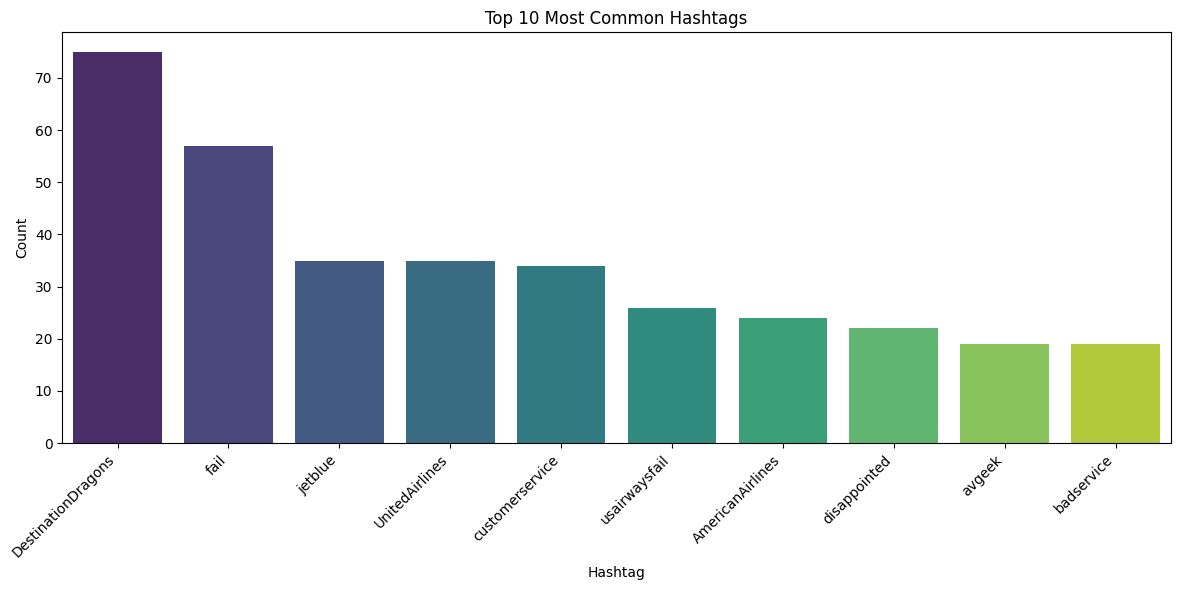

Original tweets (first 5):
1. @VirginAmerica What @dhepburn said.
2. @VirginAmerica plus you've added commercials to the experience... tacky.
3. @VirginAmerica I didn't today... Must mean I need to take another trip!
4. @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
5. @VirginAmerica and it's a really big bad thing about it

Cleaned tweets (first 5):
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


First 5 Cleaned tweets:
1. what  said
2. plus youve added commercials to the experience tacky
3. i didnt today must mean i need to take another trip
4. its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
5. and its a really big bad thing about it

First 5 Tokenized tweets:
1. ['what', 'said']
2. ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']
5. ['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
First 5 Tokenized tweets:
1. ['what', 'said']
2. ['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
3. ['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
4. ['its', 'really', 'aggressive', 't

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


First 5 Filtered tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']

First 5 Lemmatized tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercial', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']
Preprocessed tweets (first 5):
1. said
2. plus youve added commercial experience tacky
3. didnt today must mean need take another trip
4. really aggressive blast obnoxious entertainment guest face amp little recourse
5. really big bad thing


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



First 5 POS-tagged tweets:
1. [('said', 'VBD')]
2. [('plus', 'CC'), ('youve', 'NN'), ('added', 'JJ'), ('commercial', 'JJ'), ('experience', 'NN'), ('tacky', 'NN')]
3. [('didnt', 'NN'), ('today', 'NN'), ('must', 'MD'), ('mean', 'VB'), ('need', 'MD'), ('take', 'VB'), ('another', 'DT'), ('trip', 'NN')]
4. [('really', 'RB'), ('aggressive', 'JJ'), ('blast', 'NN'), ('obnoxious', 'JJ'), ('entertainment', 'NN'), ('guest', 'JJS'), ('face', 'NN'), ('amp', 'NN'), ('little', 'JJ'), ('recourse', 'NN')]
5. [('really', 'RB'), ('big', 'JJ'), ('bad', 'JJ'), ('thing', 'NN')]

First 5 lemmatized tweets:
1. ['said']
2. ['plus', 'youve', 'added', 'commercial', 'experience', 'tacky']
3. ['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
4. ['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse']
5. ['really', 'big', 'bad', 'thing']
Tokenized Tweets (first 5):
Cleaned Tweet 1: what  said
Tokens 1:       ['what', ' ', 'said']
------------

,processed_text,sentiment
0,say,neutral
1,plus add commercial experience tacky,positive
2,today mean need trip,neutral
3,aggressive blast obnoxious entertainment guest...,negative
4,big bad thing,negative


In [63]:
import pandas as pd
data=pd.read_csv('/content/Tweets.csv')
print(data.head())
tweets=data['text']
print("Extracted tweets:")
for i,tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweets}")
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    return word_tokenize(text)

tokenized_tweets = tweets.apply(tokenize_text)
print("\nfirst 5 Tokenized tweets:")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")
import re

def extract_actual_hashtags(text):
    return re.findall(r"#(\w+)", text)

actual_hashtags = tweets.apply(extract_actual_hashtags)
print("\nfirst 5 actual hashtags:")
for i, hashtags in enumerate(actual_hashtags.head()):
    print(f"{i+1}. {hashtags}")
from collections import Counter

all_hashtags = [item for sublist in actual_hashtags for item in sublist]

print("\nTop 10 most common hashtags:")
hashtag_counts = Counter(all_hashtags)

for hashtag, count in hashtag_counts.most_common(10):
    print(f"{hashtag}: {count}")
import matplotlib.pyplot as plt
import seaborn as sns

top_hashtags = hashtag_counts.most_common(10);
hashtag = [tag for tag, count in top_hashtags];
hashtag_values = [count for tag, count in top_hashtags];

plt.figure(figsize=(12, 6));
sns.barplot(x=hashtag, y=hashtag_values, hue=hashtag, palette='viridis', legend=False);
plt.title('Top 10 Most Common Hashtags');
plt.xlabel('Hashtag');
plt.ylabel('Count');
plt.xticks(rotation=45, ha='right');
plt.tight_layout();
plt.show();
import re

def clean_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.strip()

cleaned_tweets = tweets.apply(clean_text)

print("Original tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nCleaned tweets (first 5):")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

tokenized_tweets = cleaned_tweets.apply(tokenize_text)

print("First 5 Cleaned tweets:")
for i, tweet in enumerate(cleaned_tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFirst 5 Tokenized tweets:")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

filtered_tweets = tokenized_tweets.apply(remove_stopwords)

print("First 5 Tokenized tweets:")
for i, tokens in enumerate(tokenized_tweets.head()):
    print(f"{i+1}. {tokens}")

print("\n First 5 Filtered tweets:")
for i, tokens in enumerate(filtered_tweets.head()):
    print(f"{i+1}. {tokens}")
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

lemmatized_tweets = filtered_tweets.apply(lemmatize_tokens)

print("First 5 Filtered tweets:")
for i, tokens in enumerate(filtered_tweets.head()):
    print(f"{i+1}. {tokens}")

print("\nFirst 5 Lemmatized tweets:")
for i, tokens in enumerate(lemmatized_tweets.head()):
    print(f"{i+1}. {tokens}")
def join_tokens(tokens):
    return ' '.join(tokens)

preprocessed_tweets = lemmatized_tweets.apply(join_tokens)

print("Preprocessed tweets (first 5):")
for i, tweet in enumerate(preprocessed_tweets.head()):
    print(f"{i+1}. {tweet}")
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

def pos_tag_tokens(tokens):
    return nltk.pos_tag(tokens)

pos_tagged_tweets = lemmatized_tweets.apply(pos_tag_tokens)

print("\nFirst 5 POS-tagged tweets:")
for i, tagged_tokens in enumerate(pos_tagged_tweets.head()):
    print(f"{i+1}. {tagged_tokens}")

print("\nFirst 5 lemmatized tweets:")
for i, tweet in enumerate(lemmatized_tweets.head()):
    print(f"{i+1}. {tweet}")
import spacy
nlp = spacy.load("en_core_web_sm")

def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

tokenized_tweets = cleaned_tweets.apply(tokenize_text)

print("Tokenized Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Tokens {i+1}:       {tokenized_tweets.iloc[i]}")
    print("-" * 30)
import spacy
nlp = spacy.load("en_core_web_sm")

def remove_stopwords_and_spaces(text):
    doc = nlp(text)
    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]
    return filtered_tokens
tokenized_no_stopwords = cleaned_tweets.apply(remove_stopwords_and_spaces)

print("Tokens after removing stopwords, punctuation, and spaces (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print("-" * 30)
rejoined_tweets = tokenized_no_stopwords.apply(lambda x: ' '.join(x))

print("Rejoined Tweets (first 5):")
for i in range(5):
    print(f"Cleaned Tweet {i+1}: {cleaned_tweets.iloc[i]}")
    print(f"Processed Tokens {i+1}: {tokenized_no_stopwords.iloc[i]}")
    print(f"Rejoined Text {i+1}:    {rejoined_tweets.iloc[i]}")
    print("-" * 30)
import spacy
nlp = spacy.load("en_core_web_sm")

def pos_tagging_spacy(text):
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]

pos_tagged_tweets = rejoined_tweets.apply(pos_tagging_spacy)

print("PoS Tagging Results (first 5):")
for i in range(5):
    print(f"Rejoined Text {i+1}: {rejoined_tweets.iloc[i]}")
    print(f"PoS Tags {i+1}:    {pos_tagged_tweets.iloc[i]}")
    print("-" * 30)
import re
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):

    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)

    text = text.lower()

    doc = nlp(text)

    filtered_tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space and token.is_alpha
    ]

    return ' '.join(filtered_tokens)

preprocessed_tweets_combined = tweets.apply(preprocess_text_spacy)

print("Original Tweets (first 5):")
for i, tweet in enumerate(tweets.head()):
    print(f"{i+1}. {tweet}")

print("\nFully Preprocessed Tweets (first 5):")
for i, preprocessed_text in enumerate(preprocessed_tweets_combined.head()):
    print(f"{i+1}. {preprocessed_text}")
sentiment_data = pd.DataFrame({
    'processed_text': preprocessed_tweets_combined,
    'sentiment': data['airline_sentiment']
})

print("DataFrame with Processed Text and Sentiment (first 5 rows):")
display(sentiment_data.head())